In [1]:
import pandas as pd
df_train = pd.read_csv("Downloads/archive/project_train.csv")
df_test = pd.read_csv("Downloads/archive/project_test.csv")

In [2]:
print(df_train.columns)
df_train.dtypes

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')


UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

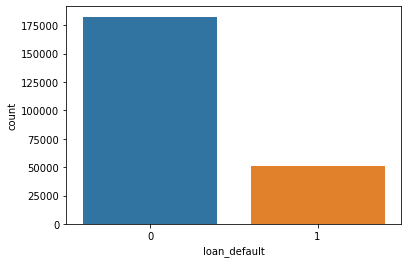

In [3]:
import seaborn as sns
sns.countplot(x=df_train['loan_default'])

In [4]:
#check null values
null_train=df_train.isnull().sum()
null_test=df_test.isnull().sum()
print(null_train)
print("===========================Test Data=================================")
null_test

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

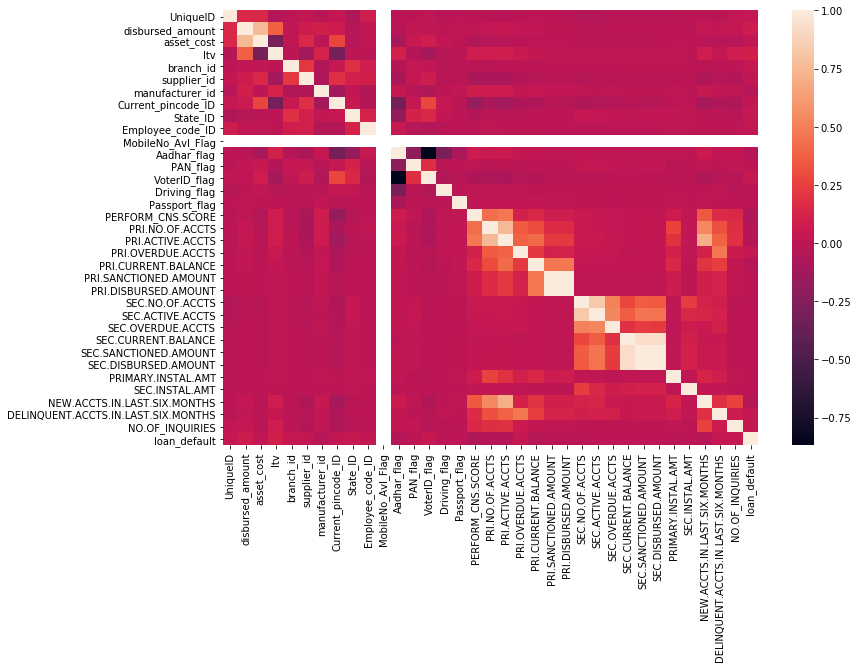

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
corelation=df_train.corr()
plt.figure(figsize=(12,8))
import seaborn as sns
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns)

In [6]:
print(df_train.shape)
print(df_test.shape)

(233154, 41)
(112392, 40)


In [7]:
'''import seaborn as sns
plt.figure(figsize=(12,8))
sns.countplot(x=df_train['credit_risk_grade'])'''

"import seaborn as sns\nplt.figure(figsize=(12,8))\nsns.countplot(x=df_train['credit_risk_grade'])"

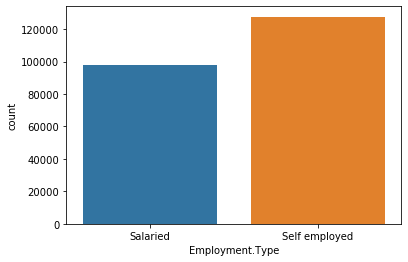

In [8]:
sns.countplot(x=df_train['Employment.Type'])

In [9]:
import numpy as np
def credit_risk(df):
    d1=[]
    d2=[]
    for i in df:
      #round_float=round(float(i))
      p = i.split("-")
      if len(p) == 1:
          d1.append(p[0])
          d2.append('unknown')
      else:
          d1.append(p[1])
          d2.append(p[0])

    return d1,d2

In [10]:
def calc_number_of_ids(row):
    return sum(row[['Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag']])

def check_pri_installment(row):
    if row['PRIMARY.INSTAL.AMT']<=1:
        return 0
    else:
        return row['PRIMARY.INSTAL.AMT']
    
def plot_2d_space(X, y, label='Classes'):   
    colors = ['red', 'green']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [11]:
risk_map = {'No Bureau History Available':-1, 
              'Not Scored: No Activity seen on the customer (Inactive)':-1,
              'Not Scored: Sufficient History Not Available':-1,
              'Not Scored: No Updates available in last 36 months':-1,
              'Not Scored: Only a Guarantor':-1,
              'Not Scored: More than 50 active Accounts found':-1,
              'Not Scored: Not Enough Info available on the customer':-1,
              'Very Low Risk':4,
              'Low Risk':3,
              'Medium Risk':2, 
              'High Risk':1,
              'Very High Risk':0}

sub_risk = {'unknown':-1, 'I':5, 'L':2, 'A':13, 'D':10, 'M':1, 'B':12, 'C':11, 'E':9, 'H':6, 'F':8, 'K':3,
       'G':7, 'J':4}
employment_map = {'Self employed':0, 'Salaried':1,np.nan:-1}

In [12]:
def features_engineering(df):
    df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'], format = "%d-%m-%y",infer_datetime_format=True)
    df['Date.of.Birth'] = pd.to_datetime(df['Date.of.Birth'], format = "%d-%m-%y",infer_datetime_format=True)
    now = pd.Timestamp('now')
    df['Age'] = (now - df['Date.of.Birth']).astype('<m8[Y]').astype(int)
    age_mean = int(df[df['Age']>0]['Age'].mean())
    df.loc[:,'age'] = df['Age'].apply(lambda x: x if x>0 else age_mean)
    df['disbursal_months_passed'] = ((now - df['DisbursalDate'])/np.timedelta64(1,'M')).astype(int)
    df['average_act_age_in_months'] = df['AVERAGE.ACCT.AGE'].apply(lambda x : int(re.findall(r'\d+',x)[0])*12 + int(re.findall(r'\d+',x)[1]))
    df['credit_history_length_in_months'] = df['CREDIT.HISTORY.LENGTH'].apply(lambda x : int(re.findall(r'\d+',x)[0])*12 + int(re.findall(r'\d+',x)[1]))
    df['number_of_0'] = (df == 0).astype(int).sum(axis=1)
    df.loc[:,'credit_risk'],df.loc[:,'credit_risk_grade']  = credit_risk(df["PERFORM_CNS.SCORE.DESCRIPTION"])
    df.loc[:, 'loan_to_asset_ratio'] = df['disbursed_amount'] /df['asset_cost']
    df.loc[:,'no_of_accts'] = df['PRI.NO.OF.ACCTS'] + df['SEC.NO.OF.ACCTS']
    df.loc[:,'pri_inactive_accts'] = df['PRI.NO.OF.ACCTS'] - df['PRI.ACTIVE.ACCTS']
    df.loc[:,'sec_inactive_accts'] = df['SEC.NO.OF.ACCTS'] - df['SEC.ACTIVE.ACCTS']
    df.loc[:,'tot_inactive_accts'] = df['pri_inactive_accts'] + df['sec_inactive_accts']
    df.loc[:,'tot_overdue_accts'] = df['PRI.OVERDUE.ACCTS'] + df['SEC.OVERDUE.ACCTS']
    df.loc[:,'tot_current_balance'] = df['PRI.CURRENT.BALANCE'] + df['SEC.CURRENT.BALANCE']
    df.loc[:,'tot_sanctioned_amount'] = df['PRI.SANCTIONED.AMOUNT'] + df['SEC.SANCTIONED.AMOUNT']
    df.loc[:,'tot_disbursed_amount'] = df['PRI.DISBURSED.AMOUNT'] + df['SEC.DISBURSED.AMOUNT']
    df.loc[:,'tot_installment'] = df['PRIMARY.INSTAL.AMT'] + df['SEC.INSTAL.AMT']
    df.loc[:,'bal_disburse_ratio'] = np.round((1+df['tot_disbursed_amount'])/(1+df['tot_current_balance']),2)
    df.loc[:,'pri_tenure'] = (df['PRI.DISBURSED.AMOUNT']/( df['PRIMARY.INSTAL.AMT']+1)).astype(int)
    df.loc[:,'sec_tenure'] = (df['SEC.DISBURSED.AMOUNT']/(df['SEC.INSTAL.AMT']+1)).astype(int)
    df.loc[:,'disburse_to_sactioned_ratio'] =  np.round((df['tot_disbursed_amount']+1)/(1+df['tot_sanctioned_amount']),2)
    df.loc[:,'active_to_inactive_act_ratio'] =  np.round((df['no_of_accts']+1)/(1+df['tot_inactive_accts']),2)
    return df

In [13]:
import re
def label_data(df):
    df.loc[:,'credit_risk_label'] = df['credit_risk'].apply(lambda x: risk_map[x])
    df.loc[:,'sub_risk_label'] = df['credit_risk_grade'].apply(lambda x: sub_risk[x])
    df.loc[:,'employment_label'] = df['Employment.Type'].apply(lambda x: employment_map[x])
    return df
def data_correction(df):
    #Many customers have invalid date of birth, so impute invalid data with mean age
    df.loc[:,'PRI.CURRENT.BALANCE'] = df['PRI.CURRENT.BALANCE'].apply(lambda x: 0 if x<0 else x)
    df.loc[:,'SEC.CURRENT.BALANCE'] = df['SEC.CURRENT.BALANCE'].apply(lambda x: 0 if x<0 else x)
    #loan that do not have current principal outstanding should have 0 primary installment
    df.loc[:,'new_pri_installment']= df.apply(lambda x : check_pri_installment(x),axis=1)
    return df
def prepare_data(df):
    df = data_correction(df)
    df = features_engineering(df)
    df = label_data(df)
    return df

In [14]:
pd.set_option('mode.chained_assignment',None)
train_data = prepare_data(df_train)
test_data = prepare_data(df_test)
print(train_data.columns)
#test_data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'new_pri_installment', 'Age', 'age',
       'disbursal_months_passed', 'average_act_age_in_month

In [15]:
to_drop = ['UniqueID', 'ltv', 'branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID','MobileNo_Avl_Flag', 'PRIMARY.INSTAL.AMT',
       'PERFORM_CNS.SCORE.DESCRIPTION','AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 
       'loan_default', 'Age',  'credit_risk', 'credit_risk_grade',
       ]
features = ['disbursed_amount', 'asset_cost','Aadhar_flag', 'PAN_flag','PERFORM_CNS.SCORE','PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT',  'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT',  'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES','disbursal_months_passed','average_act_age_in_months', 'credit_history_length_in_months',
       'number_of_0','loan_to_asset_ratio', 'no_of_accts', 'pri_inactive_accts',
       'sec_inactive_accts', 'tot_inactive_accts', 'tot_overdue_accts',
       'tot_current_balance', 'tot_sanctioned_amount', 'tot_disbursed_amount',
       'tot_installment', 'bal_disburse_ratio', 'pri_tenure', 'sec_tenure',
       'credit_risk_label','employment_label', 'age', 'new_pri_installment']

In [16]:
for i in features:
    print(i," : distinct_value")
    print(train_data[i].nunique()," : No. of unique Items")
    print(train_data[i].unique())
    print("-"*30)
    print("")

disbursed_amount  : distinct_value
24565  : No. of unique Items
[50578 47145 53278 ... 61456 51406 34259]
------------------------------

asset_cost  : distinct_value
46252  : No. of unique Items
[ 58400  65550  61360 ...  45233  52965 116009]
------------------------------

Aadhar_flag  : distinct_value
2  : No. of unique Items
[1 0]
------------------------------

PAN_flag  : distinct_value
2  : No. of unique Items
[0 1]
------------------------------

PERFORM_CNS.SCORE  : distinct_value
573  : No. of unique Items
[  0 598 305 825  17 718 818 300 786 738 688 585 615 750 801 730 758 768
 610 653 413 709 719  16  15 701 626 717 692 501 693 762 749 702  18 763
 599 824 575 607 819 841 656 836 427 687 743 783 733 708 772 650 342 680
 676 548 429 597 663 667 792 707 798 606 681 830 684 686 593 746 829 651
 710 573 695 671 729 879 603 753 502 739 605 706 657 639 785 405 690 602
 635 630 741 625 628 766  14 809 737 722 760 640 797 505 774 620 728 694
 679 470 823 685 832 662 627 392 643 727

In [17]:
from sklearn.preprocessing import  RobustScaler
rob_scaler = RobustScaler()
scaled_training = train_data.copy()
scaled_testing = test_data.copy()
scaled_training[features] = rob_scaler.fit_transform(scaled_training[features])
scaled_testing[features] = rob_scaler.fit_transform(scaled_testing[features])
X = scaled_training[features]
y = scaled_training.loan_default

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0)
classifier.fit(X_train,y_train)

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred = classifier.predict(X_test)
score_lr=classifier.score(X_test,y_test)
print(score_lr)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

0.7846925864768073
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     36614
           1       0.24      0.00      0.00     10017

    accuracy                           0.78     46631
   macro avg       0.51      0.50      0.44     46631
weighted avg       0.67      0.78      0.69     46631



array([[36580,    34],
       [10006,    11]], dtype=int64)

fpr=== [0.00000000e+00 9.28606544e-04 1.00000000e+00]
tpr=== [0.         0.00109813 1.        ]
thersholds=== [2 1 0]
0.50008476331483


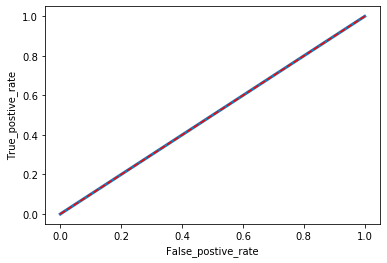

In [21]:
#Receiver operating characteristic (Roc)
from sklearn.metrics import roc_curve
fpr,tpr,thersholds=roc_curve(y_test,y_pred)
print("fpr===",fpr)
print("tpr===",tpr)
print("thersholds===",thersholds)
from sklearn.metrics import roc_auc_score
roc_auc=roc_auc_score(y_test,y_pred)
print(roc_auc)
plt.plot(fpr,tpr,linewidth=3)
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel("False_postive_rate")
plt.ylabel("True_postive_rate")
plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
classifier_dt = DecisionTreeClassifier(random_state = 0)
y_dt=classifier_dt.fit(X_train, y_train)
y_pred_dt = y_dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
score_dt=accuracy_score(y_test, y_pred_dt)
print(score_dt)

[[35835   779]
 [  753  9264]]
0.9671463189723575


In [23]:
#for random forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
y_pred_random = random_forest.predict(X_test)
cm_random = confusion_matrix(y_test, y_pred_random)
print(cm_random)
score_random=accuracy_score(y_test, y_pred_random)
print(score_random)

[[36127   487]
 [ 2614  7403]]
0.933499174368982


In [24]:
unique_id = scaled_testing.UniqueID
print(unique_id)
y_pred_rf = random_forest.predict(scaled_testing[features])
print(y_pred_rf)
submission1 = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_rf})
submission1.head()
filename = 'loan_default_rdf2.csv'

submission1.to_csv(filename,index=False)

print('Saved file: ' + filename)

0         655269
1         723482
2         758529
3         763449
4         708663
           ...  
112387    755547
112388    716994
112389    709352
112390    699795
112391    755244
Name: UniqueID, Length: 112392, dtype: int64
[1 1 0 ... 0 1 0]
Saved file: loan_default_rdf2.csv


In [27]:
#Xgboost algorithm
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier_xg=xgboost.XGBClassifier()
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}
random_search=RandomizedSearchCV(classifier_xg,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
#classifier_xg.fit(X,y)

In [28]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  9.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [29]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
'''XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)'''

In [30]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.3,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [31]:
classifier_xg=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier_xg,X,y,cv=10)
score

array([0.97774061, 0.98237262, 0.97666838, 0.97791216, 0.97349346,
       0.97971263, 0.9798413 , 0.98340124, 0.98443062, 0.98327257])

In [33]:
accuracy=score.mean()
print(accuracy)

0.9798845606100256


In [39]:
#predict the test data set
#prediction=classifier_xg.predict(scaled_testing[features])
#prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
classifier_xg.fit(X_train,y_train)
y_pred_xg_2= classifier_xg.predict(X_test)
cm_xg = confusion_matrix(y_test, y_pred_xg_2)
print(cm_xg)

[[36059   555]
 [  378  9639]]


In [35]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     36614
           1       0.95      0.96      0.95     10017

    accuracy                           0.98     46631
   macro avg       0.97      0.97      0.97     46631
weighted avg       0.98      0.98      0.98     46631



In [36]:
unique_id = scaled_testing.UniqueID
print(unique_id)
y_pred_xg = classifier_xg.predict(scaled_testing[features])
print(y_pred_xg)
submission_xg = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_xg})
print(submission_xg.head())
filename_xg= 'loan_default_xg.csv'
submission_xg.to_csv(filename,index=False)
print('Saved file: ' + filename_xg)

0         655269
1         723482
2         758529
3         763449
4         708663
           ...  
112387    755547
112388    716994
112389    709352
112390    699795
112391    755244
Name: UniqueID, Length: 112392, dtype: int64
[1 1 0 ... 1 1 0]
   UniqueID  loan_default
0    655269             1
1    723482             1
2    758529             0
3    763449             1
4    708663             1
Saved file: loan_default_xg.csv


fpr=== [0.         0.01515814 1.        ]
tpr=== [0.         0.96226415 1.        ]
thersholds=== [2 1 0]
0.9735530073556768


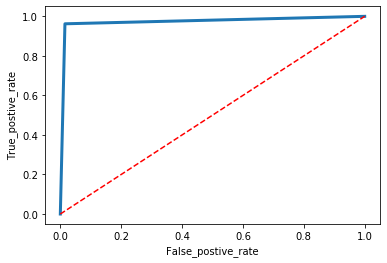

In [40]:
#Receiver operating characteristic (Roc)
from sklearn.metrics import roc_curve
fpr,tpr,thersholds=roc_curve(y_test,y_pred_xg_2)
print("fpr===",fpr)
print("tpr===",tpr)
print("thersholds===",thersholds)
from sklearn.metrics import roc_auc_score
roc_auc=roc_auc_score(y_test,y_pred_xg_2)
print(roc_auc)
plt.plot(fpr,tpr,linewidth=3)
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel("False_postive_rate")
plt.ylabel("True_postive_rate")
plt.show()

In [49]:
print(X_test.shape)

(46631, 40)


In [61]:
# %load  C:\Python\codes\WTS\tkinter2\test_sql_loan_project.py
from tkinter import *
from tkinter import messagebox
from tkcalendar import *
import sqlite3
import pandas as pd
import re
def create_table():
    global create_database,make_cursor
    create_database=sqlite3.connect("project_test.db")
    make_cursor=create_database.cursor()
    get_csv=pd.read_csv("F:/project_test.csv")
    print(get_csv.head())
    make_cursor.execute("DROP TABLE IF EXISTS test_table")
    make_cursor.execute("""CREATE TABLE IF NOT EXISTS test_table(UniqueID INTEGER,
                    disbursed_amount INTEGER,
                    asset_cost INTEGER,
                    ltv FLOAT,
                    branch_id INTEGER,         
                    supplier_id INTEGER,
                    manufacturer_id INTEGER,
                    Current_pincode_ID INTEGER,
                    Date_of_Birth TEXT,
                    Employment_Type TEXT,
                    DisbursalDate TEXT,
                    State_ID INTEGER,
                    Employee_code_ID INTEGER,
                    MobileNo_Avl_Flag INTEGER,
                    Aadhar_flag INTEGER,
                    PAN_flaG INTEGER,
                    VoterID_flag INTEGER,
                    Driving_flag INTEGER,
                    Passport_flag INTEGER,
                    PERFORM_CNS_SCORE INTEGER,
                    PERFORM_CNS_SCORE_DESCRIPTION TEXT,
                    PRI_NO_OF_ACCTS INTEGER,
                    PRI_ACTIVE_ACCTS INTEGER,
                    PRI_OVERDUE_ACCTS INTEGER,
                    PRI_CURRENT_BALANCE INTEGER,
                    PRI_SANCTIONED_AMOUNT INTEGER,
                    PRI_DISBURSED_AMOUNT INTEGER,
                    SEC_NO_OF_ACCTS INTEGER,
                    SEC_ACTIVE_ACCTS INTEGER,
                    SEC_OVERDUE_ACCTS INTEGER,
                    SEC_CURRENT_BALANCE INTEGER,
                    SEC_SANCTIONED_AMOUNT INTEGER,
                    SEC_DISBURSED_AMOUNT INTEGER,
                    PRIMARY_INSTAL_AMT INTEGER,
                    SEC_INSTAL_AMT INTEGER,
                    NEW_ACCTS_IN_LAST_SIX_MONTHS INTEGER,
                    DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS INTEGER,
                    AVERAGE_ACCT_AGE TEXT,
                    CREDIT_HISTORY_LENGTH TEXT,
                    NO_OF_INQUIRIES INTEGER)""")
    for i in range(0,len(get_csv)):
        unique_id_d=int(get_csv.iloc[i,0])
        #print(unique_id)
        disbursed_amount_d=int(get_csv.iloc[i,1])
        #print(l_d_prediction)
        asset_cost_d=int(get_csv.iloc[i,2])
        ltv_d=get_csv.iloc[i,3]
        branch_id_d = int(get_csv.iloc[i,4])
        supplier_id_d =int(get_csv.iloc[i,5])
        manufacturer_id_d =int(get_csv.iloc[i,6])
        Current_pincode_ID_d = int(get_csv.iloc[i,7])
        Date_of_Birth_d =get_csv.iloc[i,8]
        Employment_Type_d =get_csv.iloc[i,9]
        DisbursalDate_d =get_csv.iloc[i,10] 
        State_ID_d = int(get_csv.iloc[i,11])
        Employee_code_ID_d =int(get_csv.iloc[i,12]) 
        MobileNo_Avl_Flag_d = int(get_csv.iloc[i,13])
        Aadhar_flag_d = int(get_csv.iloc[i,14])
        PAN_flag_d = int(get_csv.iloc[i,15])
        VoterID_flag_d =int(get_csv.iloc[i,16])
        Driving_flag_d =int(get_csv.iloc[i,17])
        Passport_flag_d =int(get_csv.iloc[i,18])
        PERFORM_CNS_SCORE_d =int(get_csv.iloc[i,19])
        PERFORM_CNS_SCORE_DESCRIPTION_d = get_csv.iloc[i,20]
        PRI_NO_OF_ACCTS_d =int(get_csv.iloc[i,21])
        PRI_ACTIVE_ACCTS_d =int(get_csv.iloc[i,22])
        PRI_OVERDUE_ACCTS_d =int(get_csv.iloc[i,23])
        PRI_CURRENT_BALANCE_d =int(get_csv.iloc[i,24])
        PRI_SANCTIONED_AMOUNT_d =int(get_csv.iloc[i,25])
        PRI_DISBURSED_AMOUNT_d =int(get_csv.iloc[i,26])
        SEC_NO_OF_ACCTS_d =int(get_csv.iloc[i,27])
        SEC_ACTIVE_ACCTS_d=int(get_csv.iloc[i,28])
        SEC_OVERDUE_ACCTS_d =int(get_csv.iloc[i,29])
        SEC_CURRENT_BALANCE_d =int(get_csv.iloc[i,30])
        SEC_SANCTIONED_AMOUNT_d =int(get_csv.iloc[i,31])
        SEC_DISBURSED_AMOUNT_d =int(get_csv.iloc[i,32])
        PRIMARY_INSTAL_AMT_d =int(get_csv.iloc[i,33])
        SEC_INSTAL_AMT_d =int(get_csv.iloc[i,34])
        NEW_ACCTS_IN_LAST_SIX_MONTHS_d =int(get_csv.iloc[i,35])
        DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS_d =int(get_csv.iloc[i,36])
        AVERAGE_ACCT_AGE_d =get_csv.iloc[i,37]
        CREDIT_HISTORY_LENGTH_d =get_csv.iloc[i,38]
        NO_OF_INQUIRIES_d =int(get_csv.iloc[i,39])
        
        get_query=make_cursor.execute(f"""INSERT INTO test_table
                                (UniqueID,disbursed_amount, asset_cost,ltv,branch_id,
                                supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,
                                Employment_Type,DisbursalDate,State_ID,Employee_code_ID,
                                MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,
                                Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,
                                PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,
                                PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,
                                SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,
                                PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,
                                DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,
                                CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES)
                                VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,
                                ?,?,?,?,?,?,?,?,?,?)""",(unique_id_d,disbursed_amount_d,asset_cost_d,
                                ltv_d,branch_id_d,supplier_id_d,manufacturer_id_d,Current_pincode_ID_d,
                                Date_of_Birth_d,Employment_Type_d,DisbursalDate_d,State_ID_d,Employee_code_ID_d,
                                MobileNo_Avl_Flag_d,Aadhar_flag_d,PAN_flag_d,VoterID_flag_d,Driving_flag_d,
                                Passport_flag_d,PERFORM_CNS_SCORE_d,PERFORM_CNS_SCORE_DESCRIPTION_d,
                                PRI_NO_OF_ACCTS_d,PRI_ACTIVE_ACCTS_d,PRI_OVERDUE_ACCTS_d,PRI_CURRENT_BALANCE_d,
                                PRI_SANCTIONED_AMOUNT_d,PRI_DISBURSED_AMOUNT_d,SEC_NO_OF_ACCTS_d,
                                SEC_ACTIVE_ACCTS_d,SEC_OVERDUE_ACCTS_d,SEC_CURRENT_BALANCE_d,
                                SEC_SANCTIONED_AMOUNT_d,SEC_DISBURSED_AMOUNT_d,PRIMARY_INSTAL_AMT_d,
                                SEC_INSTAL_AMT_d,NEW_ACCTS_IN_LAST_SIX_MONTHS_d,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS_d,
                                AVERAGE_ACCT_AGE_d,CREDIT_HISTORY_LENGTH_d,NO_OF_INQUIRIES_d))
    create_database.commit()
    create_database.close()
def clear_input():
     unique_id_user.delete(0,'end')


        
def prediction_output():
    global loan_default_label
    get_id=int(unique_id_user.get())
    print(get_id)
    create_database=sqlite3.connect("C:\\Python\\codes\\WTS\\tkinter2\\project_test.db")
    #create_database=sqlite3.connect("project_test.db")
    make_cursor=create_database.cursor()
    make_cursor.execute("SELECT * FROM test_table WHERE UniqueID=?",[(get_id)])
    correct = make_cursor.fetchall()
    if correct:
        df_test3_f=pd.read_sql(f"select * from test_table WHERE UniqueID={get_id}",create_database)
        #print(df_test3_f)
        #prediction_ml=0
        df_test3_f.rename(columns={'PAN_flaG':'PAN_flag','Date_of_Birth':'Date.of.Birth','Employment_Type':'Employment.Type','PERFORM_CNS_SCORE':'PERFORM_CNS.SCORE',
                  'PERFORM_CNS_SCORE_DESCRIPTION':'PERFORM_CNS.SCORE.DESCRIPTION','PRI_NO_OF_ACCTS':'PRI.NO.OF.ACCTS',
                  'PRI_ACTIVE_ACCTS':'PRI.ACTIVE.ACCTS','PRI_OVERDUE_ACCTS':'PRI.OVERDUE.ACCTS','PRI_CURRENT_BALANCE':'PRI.CURRENT.BALANCE',
                  'PRI_SANCTIONED_AMOUNT':'PRI.SANCTIONED.AMOUNT','PRI_DISBURSED_AMOUNT':'PRI.DISBURSED.AMOUNT','SEC_NO_OF_ACCTS':'SEC.NO.OF.ACCTS',
                  'SEC_ACTIVE_ACCTS':'SEC.ACTIVE.ACCTS','SEC_OVERDUE_ACCTS':'SEC.OVERDUE.ACCTS','SEC_CURRENT_BALANCE':'SEC.CURRENT.BALANCE',
                  'SEC_SANCTIONED_AMOUNT':'SEC.SANCTIONED.AMOUNT','SEC_DISBURSED_AMOUNT':'SEC.DISBURSED.AMOUNT','PRIMARY_INSTAL_AMT':'PRIMARY.INSTAL.AMT',
                  'SEC_INSTAL_AMT':'SEC.INSTAL.AMT','NEW_ACCTS_IN_LAST_SIX_MONTHS':'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                  'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS':'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','AVERAGE_ACCT_AGE':'AVERAGE.ACCT.AGE',
                  'CREDIT_HISTORY_LENGTH':'CREDIT.HISTORY.LENGTH','NO_OF_INQUIRIES':'NO.OF_INQUIRIES'},inplace=True)
        pd.set_option('mode.chained_assignment',None)
        test_data_f= prepare_data(df_test3_f)
        #scaled_testing= test_data_f.copy()
        #scaled_testing[features] = rob_scaler.fit_transform(scaled_testing[features])
        list_features=test_data_f[features]
        print(list_features[:1])
        Row_list =[] 
  
        # Iterate over each row 
        for i in range((list_features[:1].shape[0])): 

            # Using iloc to access the values of  
            # the current row denoted by "i" 
            Row_list.append(list(list_features[:1].iloc[i, :]))
            list_feature= list(list_features[:1].iloc[i, :])

        # Print the list 
        #print(list_feature)
        print(Row_list) 
        #list2_features=list(list_features)
        #y_pred_rf = random_forest.predict(scaled_testing[features])
        y_pred_rf = random_forest.predict(Row_list)
        # print(scaled_testing[features].shape)
        print(y_pred_rf)
        #y_pred_xg = classifier_xg.predict(scaled_testing[features])
        #print(y_pred_xg)
        
        for prediction_ml in y_pred_rf:
            print(prediction_ml)
        if prediction_ml==1:
            loan_default_label = Label(window,text="LOAN DEFAULT =  YES",font=("arial",20,"bold"),background='red')
            loan_default_label.place(x=160,y=270)
            
        else:
            loan_default_label = Label(window,text="LOAN DEFAULT =  NO",font=("arial",20,"bold"),background='Green')
            loan_default_label.place(x=160,y=270)
            
    else:
        messagebox.showwarning("Warning","Borrower user ID not exists,\n Enter valid ID")

def clear_prediction():
    loan_default_label.destroy()    
def id_validate(borrower_id):
    #id_regex=re.compile(r'^([\d]+)$')
    #id_regex=re.compile('^(?=.*[!$?@#%^&*])(?=.*[a-z])$')
    #if (id_regex.search(borrower_id) != None):
    get_id_validate=borrower_id.get()
    if get_id_validate.isdigit():
        prediction_output()
        return True
    else:
        messagebox.showinfo("Information","Don't use Words and special characters \n in Borrower Unique ID")
        return False 
    
def main_window():
    global unique_id_user,window
    window=Tk()
    window.geometry("600x400")
    window.title("Main Window")
    window.config(background='light blue')
    title_label = Label(window,text="Borrower Loan-Default Prediction System",font=("Helvetica", 20, "bold italic"),background='red')
    title_label.place(x=60,y=40)
    note_label = Label(window,text="Note : Enter Borrower ID to predict the Loan going to Default or not",font=("Helvetica", 13, "bold italic"),background='blue')
    note_label.place(x=60,y=80)
    unique_id_var=StringVar()
    unique_id_label = Label(window,text="Borrower Unique ID:",width =20,font=("arial",15,"bold"),background='light blue')
    unique_id_label.place(x=30,y=140)
    unique_id_user = Entry(window,textvariable =unique_id_var,width=30)
    unique_id_user.place(x=260,y=143)
    #id_validate_call = window.register(id_validate)
    #unique_id_user.config(validate="key",validatecommand=(id_validate_call,'%P'))
    submit_button = Button(window,text = "SUBMIT",command=lambda:id_validate(unique_id_user),bg='orange',width=25,fg='white').place(x=380,y=180)
    clear_button = Button(window,text = "CLEAR",command=clear_input,bg='yellow',width=25,fg='red').place(x=30,y=180)
    clear_prediction_button = Button(window,text = "CLEAR PREDICTION",command=clear_prediction,bg='green',width=25,fg='white').place(x=30,y=350)
    window.mainloop()
main_window()



763449
   disbursed_amount  asset_cost  Aadhar_flag  PAN_flag  PERFORM_CNS.SCORE  \
0             46905       63896            1         0                 14   

   PRI.ACTIVE.ACCTS  PRI.OVERDUE.ACCTS  PRI.CURRENT.BALANCE  \
0                 1                  1               132480   

   PRI.SANCTIONED.AMOUNT  PRI.DISBURSED.AMOUNT  ...  tot_sanctioned_amount  \
0                 255000                255000  ...                 255000   

   tot_disbursed_amount  tot_installment  bal_disburse_ratio  pri_tenure  \
0                255000                0                1.92      255000   

   sec_tenure  credit_risk_label  employment_label  age  new_pri_installment  
0           0                 -1                 0   47                    0  

[1 rows x 40 columns]
[[46905.0, 63896.0, 1.0, 0.0, 14.0, 1.0, 1.0, 132480.0, 255000.0, 255000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.0, 29.0, 29.0, 16.0, 0.7340835107048954, 1.0, 0.0, 0.0, 0.0, 1.0, 132480.0, 255000.0, 255000.0, 